# Redes Neurais - Multilayer perceptron

![mlp](https://2.bp.blogspot.com/-sLmcD8myRC4/WjbfTsIFATI/AAAAAAAAAhI/qZCOLFRpUNkrlQ9n1_l5UoYgTdKMpZf3wCPcBGAYYCw/s400/Perceptron.jpg)
![sigmoid](https://1.bp.blogspot.com/-Q8YMTSW3hhA/Wk_t7R9nWTI/AAAAAAAAAmA/KIq3eWqKvxATYdMZPApHywWoU-O7ENVdwCPcBGAYYCw/s320/Sigmoid-function.JPG)

In [8]:
# Importing basic libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Loading the data
import zipfile
zf = zipfile.ZipFile(r'C:\Users\rodri\GitHub\My_Projects\1 Aulas Data Science\Data Sets/digit-recognizer.zip') 
zf.filelist

[<ZipInfo filename='train.csv' compress_type=deflate file_size=76775041 compress_size=9605867>,
 <ZipInfo filename='test.csv' compress_type=deflate file_size=51118296 compress_size=6385439>,
 <ZipInfo filename='sample_submission.csv' compress_type=deflate file_size=240909 compress_size=62816>]

In [17]:
df = pd.read_csv(zf.open('train.csv'))

In [19]:
# Inspecting the data
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Quantidade de amostras por número')

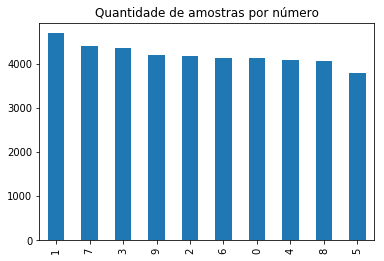

In [34]:
df.label.value_counts().plot(kind='bar')
plt.title('Quantidade de amostras por número')

In [51]:
# Separando em X e 
y = df['label'].values
X = df.drop(columns=['label']).values

print('Dimensões do y:', y.shape)
print('Dimensões do x:', X.shape)

Dimensões do y: (42000,)
Dimensões do x: (42000, 784)


In [52]:
# Padronizando nossa escala (simplificacao)
print('x maximo:', X.max())
print('x mínimo:', X.min())

x maximo: 255
x mínimo: 0


In [53]:
X = X/255.0
print('x maximo:', X.max())
print('x mínimo:', X.min())

x maximo: 1.0
x mínimo: 0.0


### EDA

In [54]:
# Qaul o tamanho de nossas imagens?
np.sqrt(784)

28.0

Número: 8


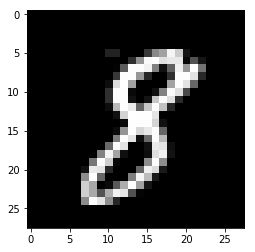

In [127]:
#Olhando uma das imagens aleatóriamente
plt.imshow(X[20].reshape(28,28), cmap='gray')
print("Número:" , y[20])

Número: 1


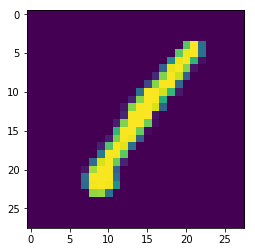

Número: 0


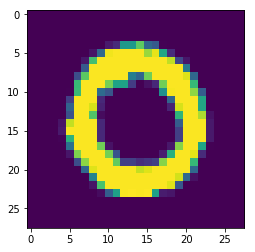

Número: 1


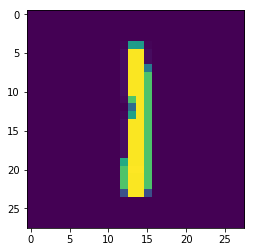

Número: 4


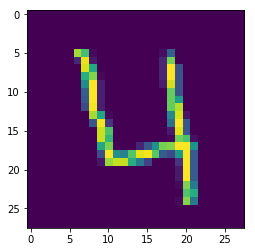

Número: 0


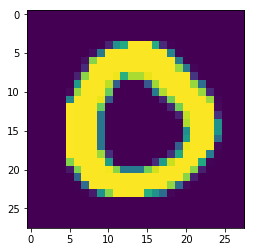

Número: 0


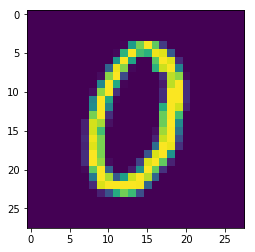

In [128]:
#Olhando as 6 primeiras imagens
for i in range(6):
    print("Número:" , y[i])
    plt.imshow(X[i].reshape(28,28), cmap='viridis')
    plt.show()

## Separando em treino e teste

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23809, random_state=42)
print('tamanho do treino:', y_train.shape)
print('tamanho do teste:', y_test.shape)

tamanho do treino: (32000,)
tamanho do teste: (10000,)


## Criando Rede Neural

In [97]:
from sklearn.neural_network import MLPClassifier

In [101]:
%%time 

model = MLPClassifier(hidden_layer_sizes=(16,16), max_iter=300)

model.fit(X_train, y_train)

Wall time: 1min 33s


In [114]:
%%time 

predictions = model.predict(X_test)

Wall time: 35.9 ms


In [103]:
print("Acuracidade do modelo:", accuracy_score(y_test, predictions), '\n')
print("Matriz de Confusão: \n\n",confusion_matrix(y_test, predictions))

Acuracidade do modelo: 0.939 

Matriz de Confusão: 

 [[ 933    0    7    2    6   14    7    3    6    1]
 [   0 1070    4    2    1    1    0    2    7    1]
 [   4    7  942    9   10    4    1   15   15    1]
 [   3    3   13 1028    1   19    1   15   12    9]
 [   3    1    8    0  906    4   12    7    1   33]
 [   5    1    4   24    5  790   11    0    7    9]
 [   7    3    2    6    7   16  899    1    6    0]
 [   1    5   12   14   12    1    0 1027    3   13]
 [   4   10    7   22    6   16    8    5  882    9]
 [   5    3    3   10   15    4    0   24    9  913]]


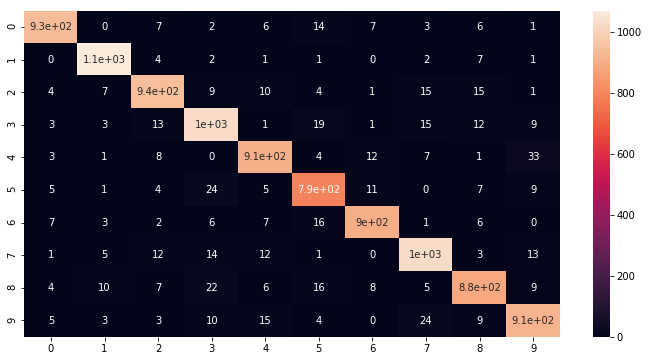

In [109]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

Número predito: 9


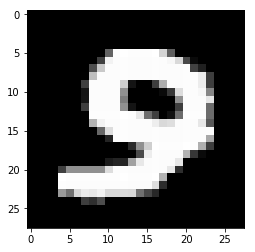

In [130]:
# Explorando algumas predições:

plt.imshow(X_test[20].reshape(28,28), cmap='gray')
print("Número predito:" , predictions[20])

Número predito: 5


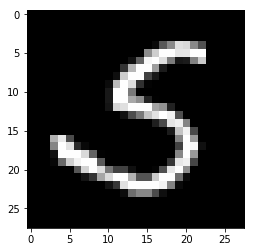

In [131]:
plt.imshow(X_test[99].reshape(28,28), cmap='gray')
print("Número predito:" , predictions[99])

In [138]:
# Veririficando coeficientes
len(model.coefs_)

3

In [165]:
len(model.coefs_[0])

784

In [166]:
model.coefs_[0]

array([[ 3.36631635e-315, -2.03190699e-315, -4.10909813e-316, ...,
         1.00337371e-315,  2.22550912e-316, -1.73342235e-316],
       [ 4.01788318e-315, -1.37341514e-315,  2.98598973e-315, ...,
         1.98976519e-315,  1.21710997e-315,  3.62793699e-315],
       [ 2.28521337e-315,  1.33624163e-315,  1.18193004e-315, ...,
         1.81576341e-315,  2.24212310e-315, -4.08812989e-315],
       ...,
       [ 9.46167772e-316, -2.34883044e-315,  3.72765292e-316, ...,
         5.41503428e-316,  9.19807102e-317, -1.18391628e-315],
       [ 2.25312298e-315,  3.62182507e-315, -2.23619562e-315, ...,
        -6.23960885e-316, -2.11649650e-316, -5.30258622e-317],
       [ 1.38940130e-315, -1.44961508e-315,  6.79151594e-316, ...,
        -2.24202025e-315,  1.55722229e-315, -2.06431294e-315]])

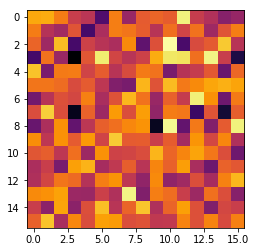

In [163]:
plt.imshow(model.coefs_[1], cmap='inferno');

In [168]:
# Model bias
len(model.intercepts_)

3

In [173]:
len(model.intercepts_[0])

16

In [174]:
model.intercepts_[0]

array([-0.12871086,  0.77721537,  0.37271637, -0.18600376,  0.4847204 ,
        0.1493481 ,  0.08710081, -0.35834456, -0.37166901,  0.29486178,
       -0.5058558 ,  0.21475481,  0.64613956, -0.16601443,  0.07500382,
        0.36928534])

In [183]:
# Investigando erros
tabela_comparacao = pd.DataFrame({'real': y_test, 'predição': predictions})
tabela_comparacao.head()

,real,predição
0,8,8
1,1,1
2,9,9
3,9,9
4,8,8


In [185]:
tabela_comparacao['diferença'] = tabela_comparacao['real'] - tabela_comparacao['predição']
tabela_comparacao.head()

,real,predição,diferença
0,8,8,0
1,1,1,0
2,9,9,0
3,9,9,0
4,8,8,0


In [188]:
erros = tabela_comparacao[tabela_comparacao['diferença'] != 0].copy()
erros.head()

,real,predição,diferença
33,9,8,1
56,6,1,5
60,4,6,-2
64,8,5,3
71,4,7,-3


In [189]:
erros.index

Int64Index([  33,   56,   60,   64,   71,   77,   93,   97,  121,  134,
            ...
            9841, 9873, 9888, 9912, 9953, 9962, 9964, 9982, 9984, 9991],
           dtype='int64', length=610)

Número predito: 8


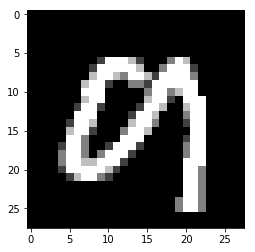

Número predito: 1


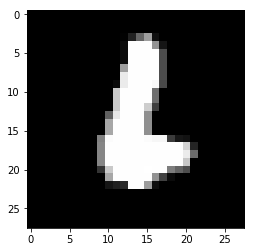

Número predito: 6


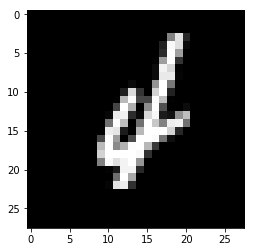

Número predito: 5


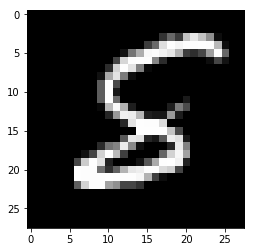

Número predito: 7


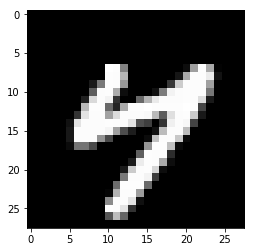

Número predito: 7


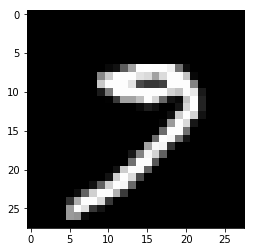

Número predito: 4


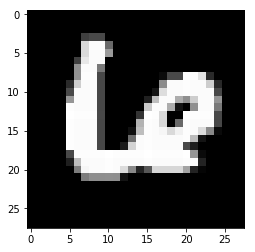

In [191]:
# verificando alguns exemplos
verificar = [33,   56,   60,   64,   71,   77,   93]

for i in verificar:
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    print("Número predito:" , predictions[i])
    plt.show()